In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# baseline in performance with logistic regression model
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

##https://machinelearningmastery.com/autoencoder-for-classification/
# train autoencoder for classification with no compression in the bottleneck layer
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
from keras.models import load_model 

In [3]:
train=pd.read_csv("/content/train.csv")
test=pd.read_csv("/content/test.csv")

In [4]:
#shape of the dataset
print(train.shape)#shape of train_data
print(test.shape)#shape of test_data

(245725, 11)
(105312, 10)


In [5]:
#checking the Null values
print((train.isnull().sum()))#Null values for train_data


ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64


In [6]:
print((test.isnull().sum()))#Null values for test_data

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64


Credit product has high null values

In [7]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [8]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [10]:
arr = train["Occupation"].unique()
arr

array(['Other', 'Salaried', 'Self_Employed', 'Entrepreneur'], dtype=object)

In [11]:
arr = train["Channel_Code"].unique()
arr

array(['X3', 'X1', 'X2', 'X4'], dtype=object)

In [12]:
train_1=train.drop(columns="ID")
train_1

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...
245720,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,Female,28,RG273,Salaried,X1,31,No,407504,No,0


In [13]:
arr = train["Credit_Product"].value_counts()
arr

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

# Explorative Data Analysis

### Univariate analysis

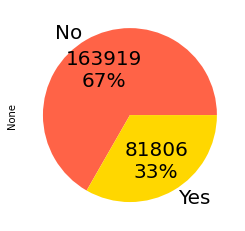

In [14]:
def label_function(val):
    return f'{val / 100 * len(train):.0f}\n{val:.0f}%'
train.groupby('Credit_Product').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                  colors=['tomato', 'gold', 'skyblue'])

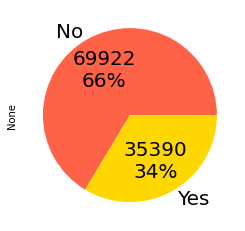

In [15]:
def label_function(val):
    return f'{val / 100 * len(test):.0f}\n{val:.0f}%'
test.groupby('Credit_Product').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                  colors=['tomato', 'gold', 'skyblue'])

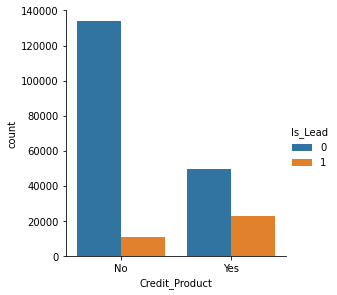

In [16]:
g = sns.catplot(x="Credit_Product", hue="Is_Lead",
                data=train, kind="count",
                height=4, aspect=1)

In [17]:
X_train=train_1.drop(['Is_Lead'],axis=1)
Y_train=train_1['Is_Lead'].values
X_test_1=test.drop(['ID'],axis=1)

In [18]:
# splitting train and test data
X_train,X_test,y_train,y_test=train_test_split(X_train,Y_train,test_size=0.2)

In [19]:
X_train.shape

(196580, 9)

In [20]:
X_test.shape

(49145, 9)

In [21]:
y_train.shape

(196580,)

In [22]:
y_test.shape

(49145,)

In [23]:
X_train['Credit_Product'].fillna('Missing',inplace=True)
X_test['Credit_Product'].fillna('Missing',inplace=True)
X_test_1['Credit_Product'].fillna('Missing',inplace=True)

# Applying Label Encoding

In [24]:
from sklearn import preprocessing
label_encoding=preprocessing.LabelEncoder()
X_train['Gender']=label_encoding.fit_transform(X_train['Gender'])
X_test['Gender']=label_encoding.fit_transform(X_test['Gender'])
X_test_1['Gender']=label_encoding.fit_transform(X_test_1['Gender'])

In [25]:
X_train['Region_Code']=label_encoding.fit_transform(X_train['Region_Code'])
X_test['Region_Code']=label_encoding.fit_transform(X_test['Region_Code'])
X_test_1['Region_Code']=label_encoding.fit_transform(X_test_1['Region_Code'])

In [26]:
X_train['Occupation']=label_encoding.fit_transform(X_train['Occupation'])
X_test['Occupation']=label_encoding.fit_transform(X_test['Occupation'])
X_test_1['Occupation']=label_encoding.fit_transform(X_test_1['Occupation'])

In [27]:
X_train['Channel_Code']=label_encoding.fit_transform(X_train['Channel_Code'])
X_test['Channel_Code']=label_encoding.fit_transform(X_test['Channel_Code'])
X_test_1['Channel_Code']=label_encoding.fit_transform(X_test_1['Channel_Code'])

In [28]:
X_train['Credit_Product']=label_encoding.fit_transform(X_train['Credit_Product'])
X_test['Credit_Product']=label_encoding.fit_transform(X_test['Credit_Product'])
X_test_1['Credit_Product']=label_encoding.fit_transform(X_test_1['Credit_Product'])

In [29]:
X_train['Is_Active']=label_encoding.fit_transform(X_train['Is_Active'])
X_test['Is_Active']=label_encoding.fit_transform(X_test['Is_Active'])
X_test_1['Is_Active']=label_encoding.fit_transform(X_test_1['Is_Active'])

In [30]:
X_train.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
57400,0,44,7,3,0,15,1,533848,0
194657,0,58,1,3,0,26,1,509943,1
187242,0,47,33,3,2,105,2,7403669,0
232302,1,48,18,3,1,63,1,1329864,1
191133,0,66,31,1,2,81,1,431703,0


# Applying Scaling  

In [36]:
scale_input = MinMaxScaler()
scale_input.fit(X_train)
X_train_scaled = scale_input.transform(X_train)
X_test_scaled = scale_input.transform(X_test)
X_test_scaled_1 = scale_input.fit_transform(X_test_1)

# Modelling- Neural Network (Multilevel Perceptrons)

In [75]:
#https://www.kaggle.com/mtinti/keras-starter-with-bagging-1111-84364/code
model = Sequential()
model.add(Dense(400, input_dim = X_train.shape[1], kernel_initializer = 'he_normal'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(200, kernel_initializer='he_normal'))
model.add(PReLU())
model.add(BatchNormalization())    
model.add(Dropout(0.2))
model.add(Dense(50, kernel_initializer = 'he_normal'))
model.add(PReLU())
model.add(BatchNormalization())    
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer = 'he_normal'))
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=[tf.keras.metrics.AUC(from_logits=True)])

In [76]:
model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=20)

Epoch 1/20
6144/6144 [==============================] - 95s 15ms/step - loss: 0.3918 - auc_1: 0.8414 - val_loss: 0.3653 - val_auc_1: 0.8597
Epoch 2/20
6144/6144 [==============================] - 35s 6ms/step - loss: 0.3721 - auc_1: 0.8550 - val_loss: 0.3572 - val_auc_1: 0.8658
Epoch 3/20
6144/6144 [==============================] - 35s 6ms/step - loss: 0.3678 - auc_1: 0.8576 - val_loss: 0.3505 - val_auc_1: 0.8693
Epoch 4/20
6144/6144 [==============================] - 35s 6ms/step - loss: 0.3630 - auc_1: 0.8607 - val_loss: 0.3478 - val_auc_1: 0.8713
Epoch 5/20
6144/6144 [==============================] - 35s 6ms/step - loss: 0.3611 - auc_1: 0.8615 - val_loss: 0.3460 - val_auc_1: 0.8711
Epoch 6/20
6144/6144 [==============================] - 36s 6ms/step - loss: 0.3592 - auc_1: 0.8628 - val_loss: 0.3461 - val_auc_1: 0.8716
Epoch 7/20
6144/6144 [==============================] - 37s 6ms/step - loss: 0.3588 - auc_1: 0.8630 - val_loss: 0.3451 - val_auc_1: 0.8714
Epoch 8/20
6144/6144 [====

In [79]:
prediction=model.predict(X_test_scaled_1)
sub=pd.read_csv("/content/sample_submission.csv")
sub['Is_Lead']=prediction
sub.to_csv('mlp_model.csv',index=False)